30.010558011627964


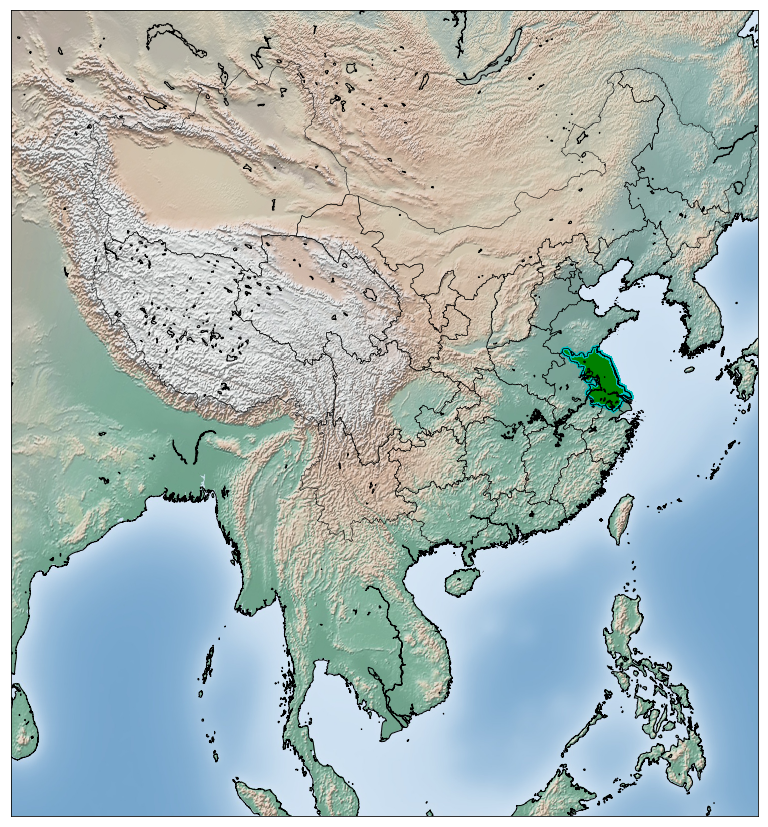

In [10]:
#in this assignment, i want to plot a map of china and create a data visualization project to show the population distribution of china 
#the data source is http://www.gadm.org/country

#this part i import necessary moudle in my assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

#first, i plot the map of china and the boundary of each provience of china. I highlight Jiangsu provience because my hometown is in there
fig = plt.figure()
fig = plt.figure(figsize=(20, 14))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

map = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

shp_info = map.readshapefile("E:\\CHN\\CHN_adm1",'states',drawbounds=True) 

for info, shp in zip(map.states_info, map.states):
    proid = info['NAME_1'] 
    if proid == 'Jiangsu':
        poly = Polygon(shp,facecolor='g',edgecolor='c', lw=3) 
        ax1.add_patch(poly)

map.shadedrelief() 

map.drawcoastlines()
print(end-start)
plt.show()
 
#by the graph below, we can find that the main feature of China's terrain is that the northwest part is high and the southeast part is low

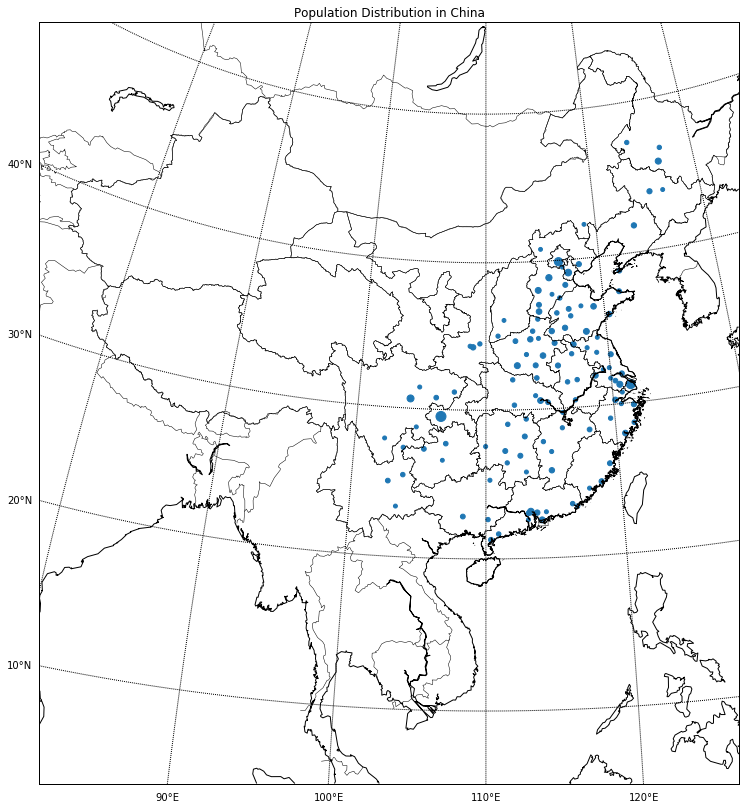

In [1]:
#this part aims to create the data visualization to show the distribution of population of china 

import numpy as np
import matplotlib
matplotlib.rcParams['toolbar'] = 'None'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from  matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(20, 14))
posi=pd.read_excel("E:\\Cities-CHINA.xlsx")

#get the value of latitude, longitude and population
lat = np.array(posi["lat"][0:120])                        
lon = np.array(posi["lon"][0:120])                        
pop = np.array(posi["pop"][0:120],dtype=float)    
gdp = np.array(posi["GDP"][0:120],dtype=float)    

size=(pop/np.max(pop))*100    

map = Basemap(projection='stere', 
              lat_0=35, lon_0=110,
              llcrnrlon=82.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=53.123,resolution='l',area_thresh=10000,rsphere=6371200.)


map.drawcoastlines()   
map.drawcountries()    
map.drawcounties()
map.readshapefile("E:\\CHN\\CHN_adm1",'states',drawbounds=True)
map.drawmapboundary()

#plot the latitude line
parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) 

#plot the longitude line
meridians = np.arange(80.,140.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) 

x,y = map(lon,lat)

map.scatter(x,y,s=size)

plt.title("Population Distribution in China")
plt.show()
#in conclusion, the population of China is mainly distributed in the southeast coast